In [66]:
import pandas as pd

In [67]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [68]:
from sklearn.cluster import KMeans

In [69]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [70]:
from sklearn.decomposition import PCA

In [71]:
import matplotlib.pyplot as plt

In [72]:
import seaborn as sns

In [73]:
customers = pd.read_csv(r'C:\Users\Siddhika\Downloads\Customers.csv')

In [74]:
transactions = pd.read_csv(r'C:\Users\Siddhika\Downloads\Transactions.csv')

In [75]:
customer_spending = transactions.groupby("CustomerID")["TotalValue"].sum().reset_index()
customer_spending.rename(columns={"TotalValue": "TotalSpending"}, inplace=True)

In [76]:
transaction_frequency = transactions.groupby("CustomerID").size().reset_index(name="TransactionFrequency")

In [77]:
customer_data = customers.merge(customer_spending, on="CustomerID", how="left")
customer_data = customer_data.merge(transaction_frequency, on="CustomerID", how="left")

In [78]:
customer_data["TotalSpending"] = customer_data["TotalSpending"].fillna(0)
customer_data["TransactionFrequency"] = customer_data["TransactionFrequency"].fillna(0)

In [115]:
encoder = OneHotEncoder(sparse_output=False)
encoded_regions = encoder.fit_transform(customer_data[["Region"]])
encoded_region_df = pd.DataFrame(encoded_regions, columns=encoder.get_feature_names_out(["Region"]))

In [117]:
features = pd.concat(
    [customer_data[["TotalSpending", "TransactionFrequency"]], encoded_region_df], axis=1
)

In [119]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [121]:
n_clusters = 3  # You can adjust this between 2 and 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(features_scaled)

C:\Users\Siddhika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [123]:
db_index = davies_bouldin_score(features_scaled, customer_data["Cluster"])
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 0.7892


In [85]:
customer_data[["CustomerID", "Cluster"]].to_csv("Customer_Segmentation.csv", index=False)
print("Results saved to 'Customer_Segmentation.csv'.")

Results saved to 'Customer_Segmentation.csv'.


In [125]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
customer_data["PCA1"] = features_pca[:, 0]
customer_data["PCA2"] = features_pca[:, 1]

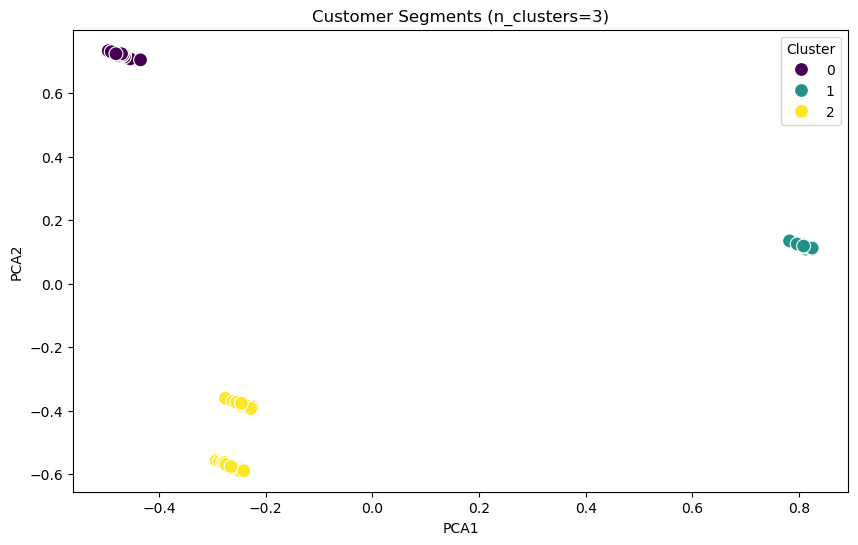

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Cluster", data=customer_data, palette="viridis", s=100
)
plt.title(f"Customer Segments (n_clusters={n_clusters})")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

In [129]:
customer_data[["CustomerID", "Cluster"]].to_csv("Customer_Segmentation.csv", index=False)
print("Customer segmentation completed. Results saved to 'Customer_Segmentation.csv'.")

Customer segmentation completed. Results saved to 'Customer_Segmentation.csv'.
